# Compare the projective and lens algorithms

Import the lens and projective mds packages. We will setup a dataset on RP^4 and reduce it to RP^2 using both packages (since the lens space with a Z/2 action is projective space) to see if the Lens MDS algorithm works.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import lens_mds
import projective_mds
from importlib import reload

In [45]:
T,n = projective_mds.circleRPn(dim=5)
D = projective_mds.graph_distance_matrix(T,k=5)
Y = projective_mds.initial_guess(T,3)

In [46]:
# Reduce the dimension using pmds
X_P,C_P,_ = projective_mds.pmds(Y,D,verbosity=0)

/opt/anaconda2/envs/stiefel-testing/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in sqrt
  return f_raw(*args, **kwargs)


No change in S matrix. Stopping iterations


In [48]:
# Check that the optimal rotations match the sign matrix.
omega = lens_mds.g_action_matrix(2,3)
omega_true = np.array([[-1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,-1]])
S = lens_mds.optimal_rotation(Y.T,omega,2)
#IP_computed = lens_mds.lens_inner_product(Y.T,omega,S)
IP = np.sign(Y@Y.T)*(Y@Y.T)
#np.allclose(IP_computed,IP)

The above shows that the inner products computed are correct. The sign matrix may not match because it is very sensitive to near-orthogonal vectors. Next we check that the cost functions match:

In [57]:
W = lens_mds.distance_to_weights(D)
#cost = lens_mds.setup_sum_cost(omega,S,D,W,p)
print(cost(Y.T))
proj_cost = projective_mds.setup_cost(D,np.sign(Y@Y.T))
print(proj_cost(Y.T))

4012211.9654724402
7182.168816562724


In [56]:
p=2
M = lens_mds.get_masks(S,p)
cost2 = lens_mds.setup_sum_cost(omega,M,D,W,p)
print(cost2(Y.T))

7182.168816562723


In [51]:
X_L,C_L = lens_mds.lmds(Y,D,2,autograd=True)

Compiling cost function...
Computing gradient of cost function...
Optimizing...
Terminated - min stepsize reached after 41 iterations, 0.63 seconds.

Through 1 iterations:
	Computed cost: 3649.80
	Percent cost difference:  49.18
	Computed cost with new M: 1013.34
Compiling cost function...
Computing gradient of cost function...
Optimizing...
Terminated - min grad norm reached after 116 iterations, 1.66 seconds.

Through 2 iterations:
	Computed cost: 23.12
	Percent cost difference:  99.37
	Computed cost with new M: 2.78
Compiling cost function...
Computing gradient of cost function...
Optimizing...
Terminated - max iterations reached after 13.37 seconds.

Through 3 iterations:
	Computed cost: 0.30
	Percent cost difference:  98.71
	Computed cost with new M: 0.24
Compiling cost function...
Computing gradient of cost function...
Optimizing...
Terminated - min grad norm reached after 426 iterations, 5.80 seconds.

Through 4 iterations:
	Computed cost: 0.24
	Percent cost difference:  18.45
	

In [58]:
# Check that both methods give same result.
print(cost2(X_L.T))
print(cost2(X_P.T))
print(np.linalg.norm(X_L-X_P))

4673.929430868078
4673.929432039017
0.0083471006269608


Looks good! Now let's test the analytic gradient:

In [53]:
X_A,C_A = lens_mds.lmds(Y,D,2,autograd=False)

Compiling cost function...
Optimizing...
Terminated - min stepsize reached after 15 iterations, 0.26 seconds.

Through 1 iterations:
	Computed cost: 3650.09
	Percent cost difference:  49.18
	Computed cost with new M: 1018.93
Compiling cost function...
Optimizing...
Terminated - min stepsize reached after 133 iterations, 1.55 seconds.

Through 2 iterations:
	Computed cost: 22.70
	Percent cost difference:  99.38
	Computed cost with new M: 2.72
Compiling cost function...
Optimizing...
Terminated - max iterations reached after 11.38 seconds.

Through 3 iterations:
	Computed cost: 0.29
	Percent cost difference:  98.72
	Computed cost with new M: 0.24
Compiling cost function...
Optimizing...
Terminated - max iterations reached after 11.62 seconds.

Through 4 iterations:
	Computed cost: 0.24
	Percent cost difference:  16.61
	Computed cost with new M: 0.24
Compiling cost function...
Optimizing...
Terminated - min stepsize reached after 2 iterations, 0.04 seconds.

Through 5 iterations:
	Compute

In [59]:
print(cost2(X_A.T))
print(np.linalg.norm(X_A-X_P))

4673.929432132649
0.05790283291164064


For fun, we're going to try doing the same with Z/p coefficients for some other choices of p.

In [16]:
p=4
X_L3,_ = lens_mds.lmds(Y,D,p,autograd=True)
X_A3,_ = lens_mds.lmds(Y,D,p,autograd=False)

Compiling cost function...
Computing gradient of cost function...
Optimizing...
Terminated - min stepsize reached after 70 iterations, 1.81 seconds.

Through 1 iterations:
	Computed cost: 3497.63
	Percent cost difference:  35.00
	Percent Difference in S:  28.77
	Computed cost with new M: 2682.49
Compiling cost function...
Computing gradient of cost function...
Optimizing...
Terminated - min stepsize reached after 77 iterations, 1.92 seconds.

Through 2 iterations:
	Computed cost: 961.82
	Percent cost difference:  72.50
	Percent Difference in S:  20.32
	Computed cost with new M: 1655.19
Compiling cost function...
Computing gradient of cost function...
Optimizing...
Terminated - min stepsize reached after 60 iterations, 1.47 seconds.

Through 3 iterations:
	Computed cost: 610.09
	Percent cost difference:  36.57
	Percent Difference in S:  12.46
	Computed cost with new M: 484.77
Compiling cost function...
Computing gradient of cost function...
Optimizing...
Terminated - min stepsize reache

In [20]:
print(cost2(X_A3.T))
print(cost2(X_L3.T))
print(np.linalg.norm(X_A3-X_L3))
print(np.linalg.norm(X_A-X_A3))

4673.929520078169
4673.929520135265
3.2092804812472916e-07
7.098955817555078


Now that we have verified this works on some data, let's play with some simple data. Here we have some random points on RP^5 in R^6 given by representatives on S^5.

In [64]:
Y_test = np.array([[0.36958081, 0.29300698, 0.02572654, 0.53969871, 0.61135288,
        0.40550388, 0.33059219, 0.0792089 , 0.74621095, 0.36764823],
       [0.36570702, 0.2460159 , 0.53474421, 0.51714196, 0.43693368,
        0.09664593, 0.62172692, 0.43252359, 0.26015863, 0.06039942],
       [0.22594272, 0.57227697, 0.50929927, 0.21175386, 0.19362319,
        0.39610209, 0.45499422, 0.55146368, 0.09354972, 0.40995549],
       [0.31211421, 0.42343251, 0.09902943, 0.30763031, 0.08130263,
        0.37628133, 0.21583957, 0.51430099, 0.2958351 , 0.47160695],
       [0.65648342, 0.40623174, 0.02442079, 0.43235801, 0.40171218,
        0.56085669, 0.21671957, 0.11807823, 0.2107268 , 0.56327422],
       [0.3875984 , 0.42638344, 0.6660314 , 0.33893944, 0.47944122,
        0.46171575, 0.45121016, 0.47338054, 0.48457298, 0.39170425]])
print(np.linalg.norm(Y,axis=0))

[8.33709849 7.94385078 6.82330343 8.41608898]


We will use Z/5 as the quotient group, and try to space the points equally.

In [65]:
p_eg = 5
d_eg = 5
omega_eg = lens_mds.g_action_matrix(p_eg,d_eg)
D_test = 0.2*np.ones((10,10))
np.fill_diagonal(D,0.0)
print(D_test)

[[0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]]


First we will compute the correct masking matrices for Y, then the approximate ones and compare them.

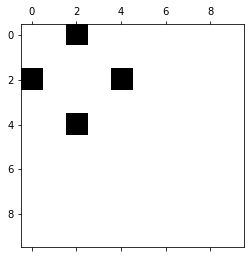

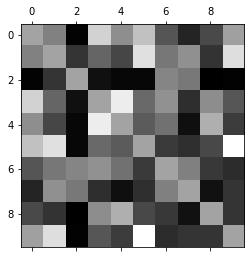

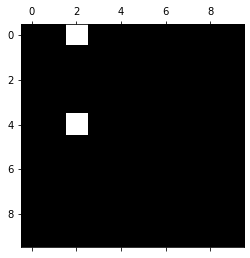

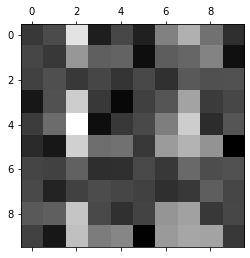

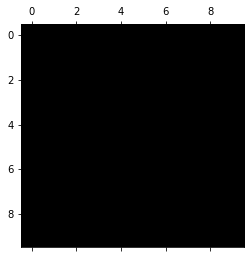

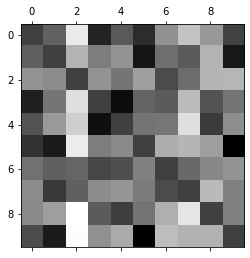

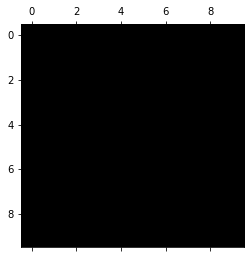

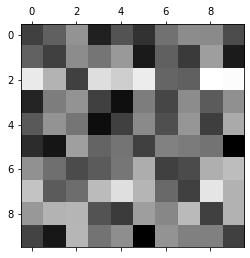

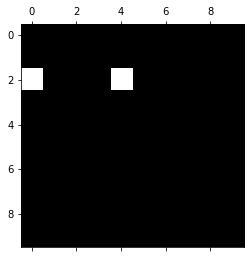

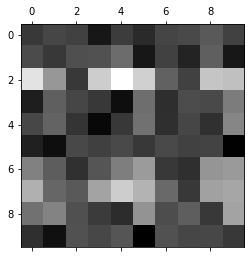

In [67]:
S = lens_mds.optimal_rotation(Y_test,omega_eg,p_eg)
M_true = lens_mds.get_masks(S,p_eg)
M_appx = lens_mds.get_blurred_masks(Y_test,omega_eg,p_eg,D_test)
for j in range(p_eg):
    plt.matshow(M_true[j],cmap='gray')
    plt.matshow(M_appx[j],cmap='gray')

In [ ]:
X = lens_mds.lmds(Y,D,p,appx=False)

In [61]:
reload(lens_mds)
X2,_ = lens_mds.lmds(Y,D,p,appx=True)

/Users/joshua/Desktop/EquivariantNDR/lens_mds.py:236: RuntimeWarning: divide by zero encountered in true_divide
  #       tmp = 1/np.abs(D - np.arccos(acos_validate(Y.T@mp(omega,i)@Y)))


Compiling cost function...
Computing gradient of cost function...
Optimizing...
Terminated - min grad norm reached after 26 iterations, 0.30 seconds.

Through 1 iterations:
	Computed cost: 10331.61
	Percent cost difference:  4.64
	Computed cost with new M: 6629.23
Compiling cost function...
Computing gradient of cost function...
Optimizing...
Terminated - min stepsize reached after 28 iterations, 0.32 seconds.

Through 2 iterations:
	Computed cost: 5939.26
	Percent cost difference:  42.51
	Computed cost with new M: 2043.70
Compiling cost function...
Computing gradient of cost function...
Optimizing...
Terminated - min stepsize reached after 44 iterations, 0.51 seconds.

Through 3 iterations:
	Computed cost: 1655.26
	Percent cost difference:  72.13
	Computed cost with new M: 121.43
Compiling cost function...
Computing gradient of cost function...
Optimizing...
Terminated - min stepsize reached after 227 iterations, 2.67 seconds.

Through 4 iterations:
	Computed cost: 93.11
	Percent cost

In [62]:
np.linalg.norm(X-X2)

0.022924028414028803